My Octave Notebook 
============

Interact with Octave and the statistics-resampling package online in Jupyter Notebook with Binder. All commands are interpreted by Octave.  Since this is a [MetaKernel](https://github.com/Calysto/metakernel), a standard set of magics are available.  Help on commands is available using the `%help` magic or using `?` with a command. For the best experience, run this notebook in [Jupyter Lab](https://mybinder.org/v2/gh/acpennlab/statistics-resampling-online/master?labpath=statistics-resampling.ipynb). 

The code cells and their output below illustrate some examples of loading data and then performing analysis using functions from the **statistics-resampling** package. Follow the links in the **Quick start** section of the [README page](https://gnu-octave.github.io/statistics-resampling/readme.html), or on the [Function reference page](https://gnu-octave.github.io/statistics-resampling/function_reference), to find further examples. The example data files provided, **data1.tsv** and **data2.csv**, can be edited directly in this instance of JupyterLab. 

The statistics-resampling package already comes installed and loaded at **statistics-resampling-online**. Visit [GNU Octave Packages](https://gnu-octave.github.io/packages/) to see what other packages are available and how to install them. To load a newly installed package called `<package-name>`, use the command `pkg load <package-name>`. To preview demonstration number `X` of a function called `<function-name>`, use the command `demo ('<function-name>', X)`. To get more information about a particular function called `<function-name>`, use the command `help <function-name>`. Note that the **parallel** package cannot be installed at **statistics-resampling-online**, and that additions to the binder environment may be required to build or run some other Octave packages.

Some Octave packages come already installed and in this statistics-resampling-online Binder environment. If you were running Octave on your own machine, you would need to install and load the statistics-resampling package first by running the code in the following two cells:

In [1]:
# Run this command once to install the package
pkg install "https://github.com/gnu-octave/statistics-resampling/archive/refs/heads/master.zip"

The statistics-resampling package was installed into the directory:
/home/jovyan/.local/share/octave/api-v58/packages/statistics-resampling-5.6.1-dev
License and copyright information can be found at:
https://github.com/gnu-octave/statistics-resampling/blob/master/COPYING


In [2]:
# Run this command in each new Octave session
pkg load statistics-resampling

Run the code in the next code cell if you wish to know:
1) The version of GNU Octave that you are running
2) What packages (and their version) are already installed (and loaded*) here
3) More information about the statistics-resampling package

In [2]:
ver('Octave');
pkg list;
pkg describe -verbose statistics-resampling

----------------------------------------------------------------------
GNU Octave Version: 8.3.0 (hg id: 6fc591af58ba)
GNU Octave License: GNU General Public License
Operating System: Linux 6.8.0-90-generic #91-Ubuntu SMP PREEMPT_DYNAMIC Tue Nov 18 14:14:30 UTC 2025 x86_64
----------------------------------------------------------------------
Package Name           | Version   | Installation directory
-----------------------+-----------+-----------------------
                coder  |     1.9.1 | .../octave/api-v58/packages/coder-1.9.1
              control  |     4.0.0 | .../octave/api-v58/packages/control-4.0.0
       data-smoothing  |     1.3.0 | .../api-v58/packages/data-smoothing-1.3.0
            dataframe  |     1.2.0 | .../api-v58/packages/dataframe-1.2.0
               fileio  |     1.2.2 | .../octave/api-v58/packages/fileio-1.2.2
                   ga  |    0.10.4 | .../octave/api-v58/packages/ga-0.10.4
                   io *|     2.6.4 | .../share/octave/api-v58/packages/io

In [13]:
# Load the predictor genotype - it has two levels: G1 and G2
[~, genotype]  = xlsread ('../data/basic_properties_data_coded.xlsx', 'OGS', 'E2:E77');

# Load the predictor condition - it has three levels: C1, C2 and C3
[~, condition] = xlsread ('../data/basic_properties_data_coded.xlsx', 'OGS', 'F2:F77');

# Load the outcome
maxApnum = xlsread ('../data/basic_properties_data_coded.xlsx', 'OGS', 'R2:R77');


MODEL FORMULA (based on Wilkinson's notation):

maxApnum ~ 1 + genotype + condition + genotype:condition

MODEL COEFFICIENTS

name                                   coeff       CI_lower    CI_upper    p-val
--------------------------------------------------------------------------------
(Intercept)                            +10.94      +9.331      +12.55      <.001
genotype_1                             -2.941      -5.221      -0.6612      .013
condition_1                            +0.05882    -2.917      +3.034       .966
condition_2                            +0.7255     -1.202      +2.653       .454
genotype:condition_1                   +3.584      -0.02918    +7.197       .052
genotype:condition_2                   +4.275      +1.051      +7.498       .008



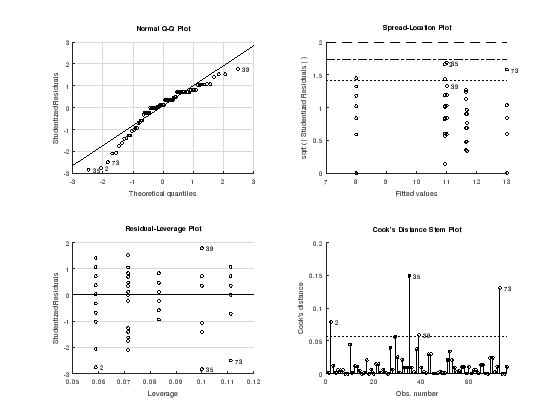

In [14]:
# Fit linear model by ordinary least squares to one of the outcomes
[STATS, BOOTSTAT, AOVSTAT, PREDERR, MAT] = bootlm (maxApnum, {genotype, condition}, 'model', ...
                             'full', 'display', 'on', 'varnames', {'genotype', 'condition'}, ...
                             'seed', 1);

In [16]:
AOVSTAT

AOVSTAT =

  scalar structure containing the fields:

    MODEL =
    {
      [1,1] = maxApnum ~ 1 + genotype
      [2,1] = maxApnum ~ 1 + genotype + condition
      [3,1] = maxApnum ~ 1 + genotype + condition + genotype:condition
    }

    SS =

        6.4954
       95.5588
       70.2816

    DF =

       1
       2
       2

    MS =

        6.4954
       47.7794
       35.1408

    F =

       0.7371
       5.4222
       3.9880

    PVAL =

       3.9974e-01
       6.7007e-03
       2.4802e-02

    FPR =

       0.500000
       0.083555
       0.199513

    SSE = 616.82
    DFE = 70
    MSE = 8.8117

